- 데이터 준비하기

In [104]:
import pandas as pd
import numpy as np

In [105]:
df = pd.read_csv('data/movie_data_Name.csv')
df.head(1)

,title,budget,genres,country,charactor,director,vote_score,vote_count,vote_weight
0,Thor: Love and Thunder,250000000,"['Action', 'Adventure', 'Fantasy']",['United States of America'],Christian Bale,Taika Waititi,6.772,1752,10.099587


- 데이터 분석

In [106]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams.update({'text.color': "white",
                    'axes.labelcolor': "white",
                     'xtick.color': "white",
                     'ytick.color': "white"
                     })

- vote_weight(평가 가중치) 분석

In [107]:
df.vote_weight.describe()

count    5130.000000
mean       24.572971
std        95.015880
min         5.530821
25%         8.817052
50%        11.155580
75%        17.392227
max      1494.659298
Name: vote_weight, dtype: float64

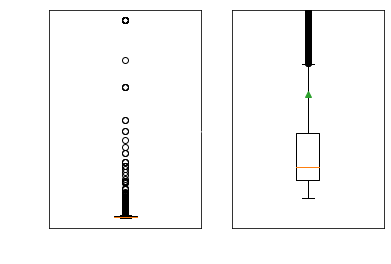

In [108]:
# BOXPLOT 중앙값 : 11.155580
plt.subplot(1, 2, 1)
plt.boxplot(df.vote_weight)
plt.xlabel("Vote_weight")
plt.ylabel("Score")

plt.subplot(1, 2, 2)
plt.boxplot(df.vote_weight, showmeans=True)
plt.xlabel("Vote_weight_detail")
plt.ylabel("Score")
plt.ylim(0, 40)
plt.show()

<pre>따라서 결과값은 중앙값 기준인 약 11로 result를 0, 1로 나눈다.</pre>

- vote_weight와 genres HeatMap

In [109]:
import ast

In [110]:
# 장르에 따른 평가 가중치 값 합
genres_type = {}
temps = []
for idx in df.index :
    genres = ast.literal_eval(df.genres[idx])
    vote_weight = df.vote_weight[idx]
    for genre in  genres:
        temps.append([genre, vote_weight])
for temp in temps:
    try:
        genres_type[temp[0]] += temp[1] # dictionary에 있으면 점수 합산
    except:
        genres_type[temp[0]] = temp[1]  # dictionary에 없으면 선언 및 점수

In [111]:
df_genreVote_total = pd.DataFrame(list(genres_type.items()), columns=['genres', 'vote_weight_total'])

In [112]:
df_genreVote_total

,genres,vote_weight_total
0,Action,42804.047065
1,Adventure,27633.537475
2,Fantasy,20540.346169
3,Family,11193.084367
4,Animation,7539.559372
5,Comedy,29329.214948
6,Science Fiction,20036.945681
7,Drama,51872.927000
8,Horror,20639.926332
9,Thriller,36422.622739


In [113]:
# HeapMap : 결과값이 높을수록 두변수가 높은 상관관계를 갖고 있다는 것.
# genres 종류에 따라 나온 결과 값을 데이터프레임 변형, 해당하는 값만 부여하고 나머지는 0으로 부여
# 가중치 값은 반올림하여 정수형으로 바꿈.
df_genreVote_each = pd.DataFrame(columns=df_genreVote_total.genres)
for idx in df.index:
    genres = ast.literal_eval(df.genres[idx])
    vote_weight = int(round(df.vote_weight[idx], 1))
    # 한 줄 0으로 초기화
    df_genreVote_each.loc[idx] = 0
    for genre in genres:
        df_genreVote_each.loc[idx][str(genre)] = vote_weight  # 한 줄 값 부여
df_genreVote_each['vote_weight'] = df.vote_weight.round(1).astype(int)

In [114]:
df_genreVote_each.set_index('vote_weight', inplace=True)

In [115]:
df_genreVote_each.head(3)

genres,Action,Adventure,Fantasy,Family,Animation,Comedy,Science Fiction,Drama,Horror,Thriller,Crime,Mystery,Music,History,TV Movie,War,Romance,Documentary,Western
vote_weight,,,,,,,,,,,,,,,,,,,
10,10,10,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,0,12,12,12,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0
9,9,9,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0


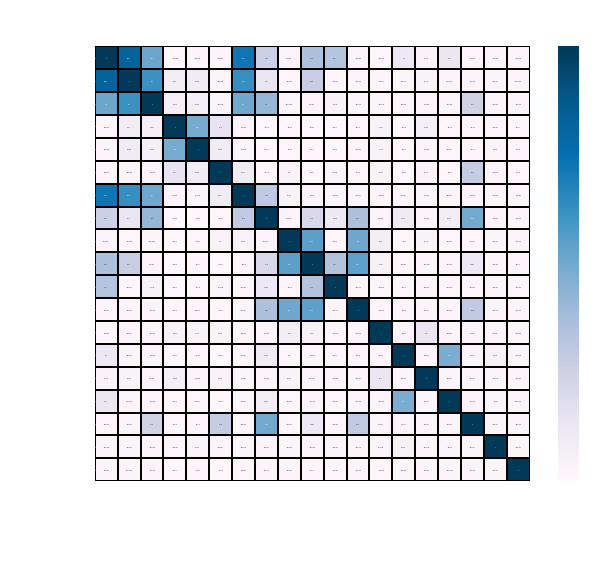

In [116]:
# https://hong-yp-ml-records.tistory.com/33 -> heatmap에 관한내용.
import seaborn as sns
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
# plt.title("원하는 제목", size = 원하는 크기)
plt.title("Genres of vote_weight", y = 1.05, size = 15)
sns.heatmap(df_genreVote_each.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square = True, cmap = colormap, linecolor = "black", annot = True, annot_kws = {"size" : 2})
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

################################### 잘못 출력 vote_weight와의 상관관계가 아닌 genres간의 관계로 출력
################################### 나쁘지는 않음 대신 색깔진한것은 상관X

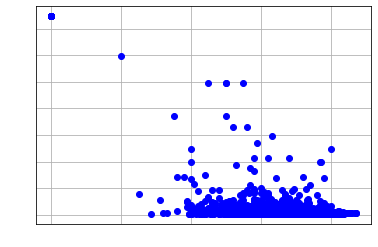

In [117]:
# 세로 : result, 세로 : vote_score
plt.plot(df.vote_score, df.vote_weight, 'bo')
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid()
plt.show()